In [1]:
# Load a mask, resample the myocard and interpolate it smooth

In [2]:
# define logging and working directory
# ------------------------------------------
from ProjectRoot import change_wd_to_project_root
change_wd_to_project_root()
# jupyter magic config
# ------------------------------------------
%matplotlib inline
%reload_ext autoreload
%autoreload 2
# this should import glob, os, and many other standard libs
# ------------------------------------------ 
from src.utils.Notebook_imports import *
# local imports
# ------------------------------------------ 
from src.utils.Utils_io import Console_and_file_logger, init_config
# import external libs
# ------------------------------------------ 
import pandas as pd
import numpy as np
from ipyfilechooser import FileChooser
import glob
import os

search for root_dir and set working directory
Working directory set to: /mnt/ssd/git/dynamic-cmr-models


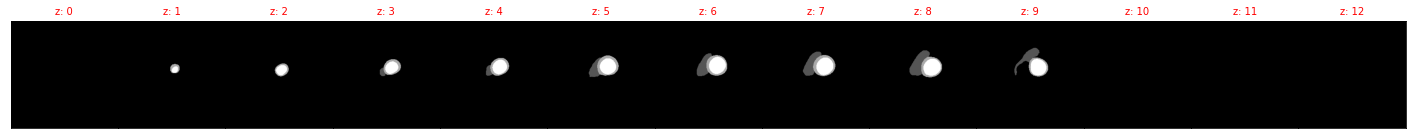

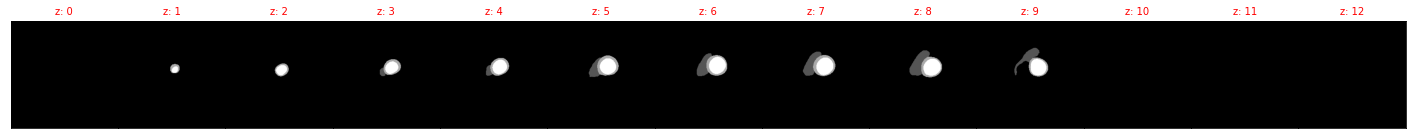

In [17]:
import SimpleITK as sitk
from src.visualization.Visualize import show_2D_or_3D
from src.data.Dataset import split_one_4d_sitk_in_list_of_3d_sitk
msk_4d = sitk.ReadImage('/mnt/ssd/data/dmd/02_imported_4D_unfiltered/sax/aa_20180710_volume_mask.nrrd')
msk_3ds = split_one_4d_sitk_in_list_of_3d_sitk(msk_4d)
t = 4
msk= msk_3ds[t]
show_2D_or_3D(msk)

new size: [186.66666667 186.66666667  69.33333333]
(186, 186, 69)


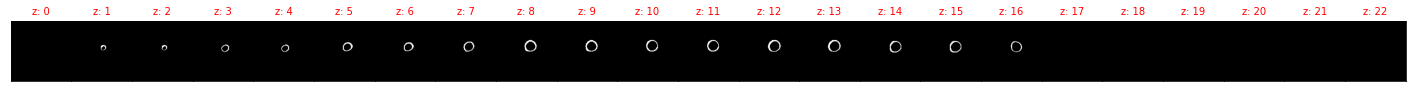

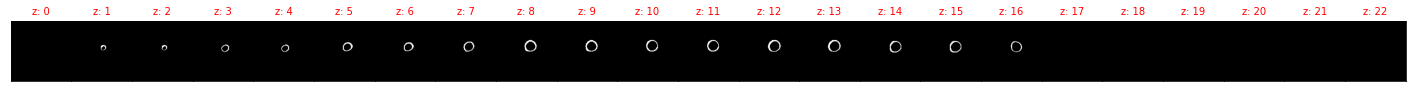

In [41]:
# select the myo mask
old_size = np.array(msk.GetSize())
old_spacing = np.array(msk.GetSpacing())
target_spacing = np.array((1.5,1.5,1.5))
new_size = (old_size * old_spacing) / target_spacing
print('new size: {}'.format(new_size))
interpolate = sitk.sitkNearestNeighbor
from src.data.Preprocess import resample_3D
res_myo = resample_3D(sitk_img=msk,size=new_size,spacing=target_spacing,interpolate=interpolate)
print(res_myo.GetSize())
show_2D_or_3D(res_myo==2)

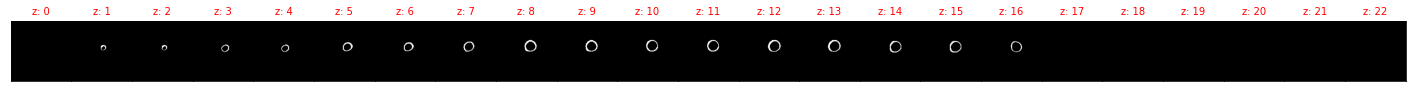

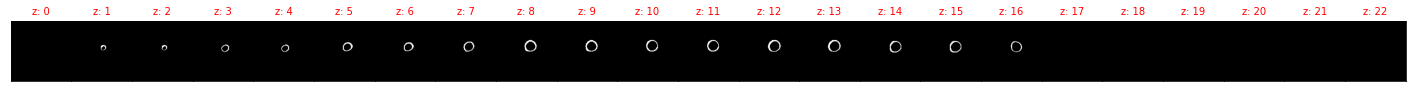

In [86]:
myo = sitk.GetArrayFromImage(res_myo==2)

show_2D_or_3D(myo)

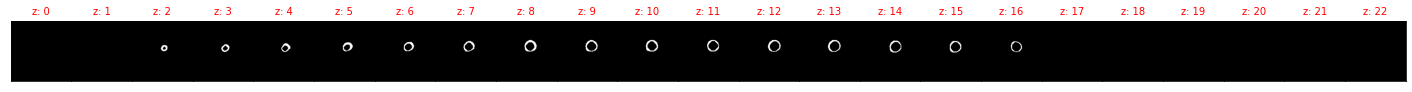

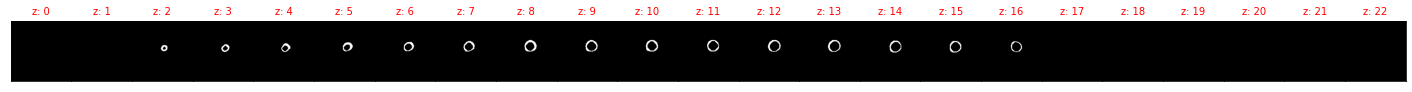

In [104]:
import scipy.ndimage as ndimage
from scipy.ndimage import gaussian_filter
sigma = 0.1
kernel = np.ones((3,3,3))
smooth = scipy.ndimage.binary_closing(myo, iterations =6)
show_2D_or_3D(smooth)

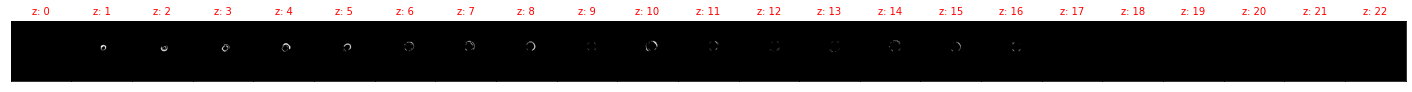

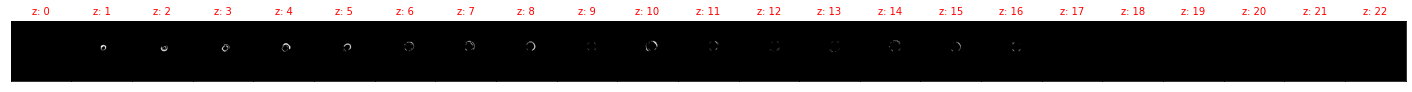

In [105]:
diff = myo-smooth
show_2D_or_3D(diff)

In [106]:
sitk_img = sitk.GetImageFromArray(smooth.astype(np.uint8))
sitk_img.SetSpacing((1.5,1.5,1.5))
sitk.WriteImage(sitk_img,'/mnt/ssd/data/temp/smooth.nii')

In [107]:
temp = list(range(5))
print(temp)

[0, 1, 2, 3, 4]


In [113]:
import numpy as np
temp = np.zeros((5,10,10,10))
print(temp.shape)
a = np.repeat(temp[0:1],3, axis=0)
print(a.shape)

(5, 10, 10, 10)
(3, 10, 10, 10)
